In [1]:
# 导入需要的包
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
# 从txt xyzi 格式的点云文件中获取数据 i指亮度
pointCloud = np.genfromtxt('./1.txt',delimiter=', ')
pointCloud

array([[-104.8   ,  -49.7376,  192.0104,   35.    ],
       [-104.7   ,  -49.7376,  192.0104,   36.    ],
       [-104.6   ,  -49.7376,  192.0008,   36.    ],
       ...,
       [ 102.6   ,   49.7376,  195.6008,   89.    ],
       [ 102.7   ,   49.7376,  195.656 ,   35.    ],
       [ 102.8   ,   49.7376,  195.6248,   14.    ]])

In [3]:
# 将点云数据转换为整数
#由于数据的精度问题，最高精度为小数点后四位，所以等比例*1000，第四维数据是灰度值，不变。
factor = np.array([10,10,10,1]) 
pointCloud = np.multiply(pointCloud,factor)
pointCloud = pointCloud.astype(np.int32)
pointCloud

array([[-1048,  -497,  1920,    35],
       [-1047,  -497,  1920,    36],
       [-1046,  -497,  1920,    36],
       ...,
       [ 1026,   497,  1956,    89],
       [ 1027,   497,  1956,    35],
       [ 1028,   497,  1956,    14]])

In [4]:
# 计算xyz中的最小数
minNum = np.amin(pointCloud,axis=0)
minNum[3] = 0
minNum
pointCloud = np.subtract(pointCloud,minNum)
pointCloud

array([[   1,    0,    3,   35],
       [   2,    0,    3,   36],
       [   3,    0,    3,   36],
       ...,
       [2075,  994,   39,   89],
       [2076,  994,   39,   35],
       [2077,  994,   39,   14]])

In [5]:
row = np.amax(pointCloud,0)[0]+1
column = np.amax(pointCloud,0)[1]+1
np.amax(pointCloud,0)

array([2079,  994,  282,  255])

In [6]:
factor = np.array([1,1,255/282,1]) 
pointCloud = np.multiply(pointCloud,factor)
pointCloud = pointCloud.astype(np.int32)
pointCloud

array([[   1,    0,    2,   35],
       [   2,    0,    2,   36],
       [   3,    0,    2,   36],
       ...,
       [2075,  994,   35,   89],
       [2076,  994,   35,   35],
       [2077,  994,   35,   14]])

In [7]:
dethPicture = np.zeros((row,column),dtype=np.uint8)
identityPicture = np.zeros((row,column),dtype=np.uint8)

for data in pointCloud:
    dethPicture[data[0]][data[1]] = data[2]
    identityPicture[data[0]][data[1]] = data[3]

In [8]:
cv.imwrite('./depth.png',dethPicture)
cv.imwrite('./identity.png',identityPicture)

True

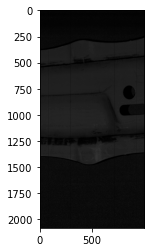

In [9]:
plt.imshow(identityPicture,cmap='gray')

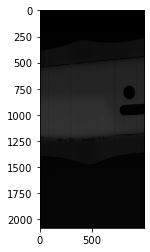

In [10]:
plt.imshow(dethPicture,cmap='gray')

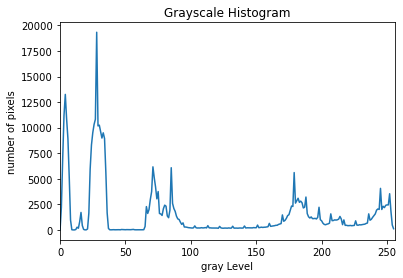

In [14]:
hist = cv.calcHist([dethPicture], [0], None, [256], [0, 256])
hist[0] = 0
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("gray Level")
plt.ylabel("number of pixels")
plt.xlim([0, 256])
plt.plot(hist)

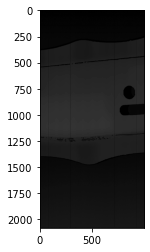

In [19]:
equalize = cv.equalizeHist(dethPicture)
cv.imwrite('./equalize.png',equalize)
plt.imshow(equalize,cmap='gray')

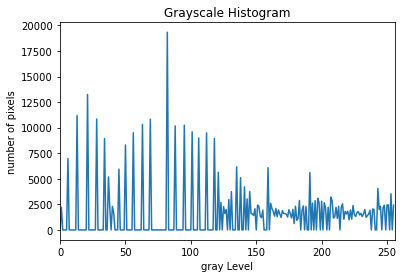

In [18]:
hist = cv.calcHist([equalize], [0], None, [256], [0, 256])
hist[0] = 0
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("gray Level")
plt.ylabel("number of pixels")
plt.xlim([0, 256])
plt.plot(hist)